In [1]:
epochs = 3
rate = 0.5 ** 10
batch_size = 10
metric_kwargs = {
    'task': 'multiclass', 
    'num_classes': 10,
}

In [2]:
import torch, torchvision


transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.mnist.MNIST('.', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.mnist.MNIST('.', train=False, transform=transform, download=True)

In [3]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [4]:
class MnistNet(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super(MnistNet, self).__init__(*args, **kwargs)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(
                1,
                32,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(
                kernel_size=2,
                stride=2,
            ),
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(
                32,
                64,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(
                kernel_size=2,
                stride=2,
            ),
        )
        self.dropout = torch.nn.Dropout()
        self.fc1 = torch.nn.Linear(7 * 7 * 64, 1024)
        self.fc2 = torch.nn.Linear(1024, 10)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [5]:
model = MnistNet()
model.load_state_dict(state_dict=torch.load('conv_net_model.ckpt'))
# criterion = torch.nn.CrossEntropyLoss()

<All keys matched successfully>

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=rate)

In [ ]:
import torchmetrics
import matplotlib.pyplot as plt

metric = torchmetrics.Accuracy()
model.train()
total_step = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        predictions = model(images)
        loss = metric(predictions, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (j := i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}%'.format(epoch + 1, epochs, j, total_step, loss.item(), metric(predictions, labels)))

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'

In [6]:
import torchmetrics


metrics = {
    'accuracy': torchmetrics.Accuracy(**metric_kwargs),
    'precision': torchmetrics.Precision(**metric_kwargs),
    'recall': torchmetrics.Recall(**metric_kwargs),
    'f1-score': torchmetrics.F1Score(**metric_kwargs),
}

---------------- 0
---------------- 1
---------------- 2
---------------- 3
---------------- 4
---------------- 5
---------------- 6
---------------- 7
---------------- 8
---------------- 9
---------------- 10
---------------- 11
---------------- 12
---------------- 13
---------------- 14
---------------- 15
---------------- 16
---------------- 17
---------------- 18
---------------- 19
---------------- 20
---------------- 21
---------------- 22
---------------- 23
---------------- 24
---------------- 25
---------------- 26
---------------- 27
---------------- 28
---------------- 29
---------------- 30
---------------- 31
---------------- 32
1 tensor(2)
Test of the model on the 10000 test images:
	Accuracy: 0.9972972869873047 %
	Precision: 0.9972972869873047 %
	Recall: 0.9972972869873047 %
	F1-score: 0.9972972869873047 %


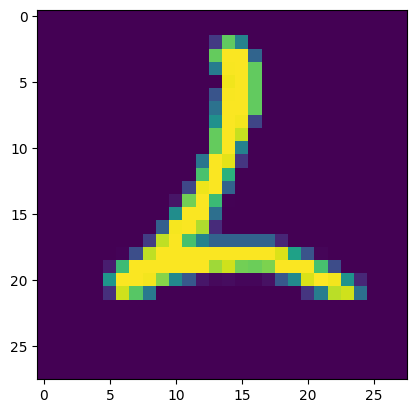

In [11]:
import matplotlib.pyplot as plt


model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        predictions = model(images)
        _, predicted = torch.max(predictions.data, 1)
        for metric in metrics.values():
            metric(predicted, labels)
        
        flag = True
        print('----------------', i)
        for image, prediction, label in zip(images, predictions, labels):
            pred = [i for i in prediction].index(max(prediction))
            if pred == label:
                continue
            else:
                flag = False
                plt.imshow(image.reshape((28,28)))
                print([i for i in prediction].index(max(prediction)), label)
                break

        if not flag:
            break
        
    print(f'Test of the model on the {len(test_dataset)} test images:')
    for metric in metrics:
        print(f'\t{metric.capitalize()}: {metrics[metric].compute()} %')


# Сохраняем модель и строим график
torch.save(model.state_dict(), 'conv_net_model.ckpt')

